In [ ]:
# 1. Read the CSV file in Pandas and create a DataFrame named Grc_df. What is the number of
# rows and columns in Grc_df? Print the first 10 and last 10 rows of Grc_df
import pandas as pd

Grc_df = pd.read_csv("Grocery_dataset.csv")

print("Antall rader og kolonner", Grc_df.shape)

print(" ")
print("-------------her er de første 10 linjene til datasettet-------------")
print(Grc_df.head(10)) # head viser de første 10 i 

print(" ")
print("-------------her er de siste 10 linjene til datasettet-------------")
print(Grc_df.tail(10)) # tail viser de siste 10 i 

Antall rader og kolonner (5000, 12)
 
-------------her er de første 10 linjene til datasettet-------------
  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.26

In [ ]:
# 2. Are there any null values in the Grc_df? If yes, then in which columns and how many?
# Finally, handle these null values using any strategy shown during the labs.

import pandas as pd

Grc_df = pd.read_csv("Grocery_dataset.csv")


# viser ale rader og koloner, her ser vi det er 5000 rader og 12 kolonner
print("Antall rader og kolonner", Grc_df.shape)

# bruker isnull() for å finne nullverdier i tabellen, kunne også brukt isna som i labsa, men jeg så det hadde samme effekt
print("Alle nullverdier: ")
print(Grc_df.isnull().sum())


print("\nEtter å ha fyllt nullverdiene")

# bruker medianen for å fylle nullverdiene siden vi snakker om vekt
Grc_df["Item_Weight"] = Grc_df["Item_Weight"].fillna(Grc_df["Item_Weight"].median())

# lager en helt ny kategori siden Outlet_size har tre ulike kategorier: small, medium, high, jeg brukte unknown size for de som haddde nullverdier
Grc_df["Outlet_Size"] = Grc_df["Outlet_Size"].fillna("Unknown Size")


# det viser ingen nullverdier nå
print(Grc_df.isnull().sum())


Antall rader og kolonner (5000, 12)
Alle nullverdier: 
Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Etter å ha fyllt nullverdiene
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [ ]:
# 3. How many unique Outlet Sizes are there in the Grc_df? Which outlet size is maximum, and
# which is minimum?

import pandas as pd

Grc_df = pd.read_csv("Grocery_dataset.csv")

print(Grc_df["Outlet_Size"].unique())

# oppgaven tidligere så fylte jeg inn nullverdiene med "Unknown size", de ulike størrelsene i Grc_df vil da se ut som

Grc_df["Outlet_Size"] = Grc_df["Outlet_Size"].fillna("Unknown Size")
print(Grc_df["Outlet_Size"].unique())

# High er maximum outlet size og small er minimum outlet size
# Unknown size er gitt til det som har nullverdi i datasettet

['Medium' nan 'High' 'Small']
['Medium' 'Unknown Size' 'High' 'Small']


In [ ]:
# 4. How many unique Item Fat Content types are in the Grc_df? List them. Do you see any
# issues with the Item Fat Content types? If yes, then handle this issue.

import pandas as pd

Grc_df = pd.read_csv("Grocery_dataset.csv")

print(Grc_df["Item_Fat_Content"].unique())

# Problemet er at Low fat, low fat og LF sees på ulike verdier, vi må gruppere dem slik at Low fat = low fat & LF
# Samme gjelder med Regular & Reg

Grc_df["Item_Fat_Content"] = Grc_df["Item_Fat_Content"].replace({'low fat' : 'Low Fat', 'LF' : 'Low Fat', 'Low fat' : 'Low fat', 'reg' : 'Regular'})
print("\nEtter å ha fikset på de ulike tittlene med samme betydning")
print(Grc_df["Item_Fat_Content"].unique())


['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Etter å ha fikset på de ulike tittlene med samme betydning
['Low Fat' 'Regular']


In [59]:
# 5. Drop the columns having index values of 0, 6 and create a new DataFrame Grc_new_df.
import pandas as pd

Grc_df = pd.read_csv("Grocery_dataset.csv")

print("Antall kolonner: ", Grc_df.shape)
print(Grc_df.columns)
print("")

# nye DataFrame Grc_new_df
# dropper klonne 0 og 6 i axis=1 som betyr horisontalt, altså kolonnene 
# de som skal fjernes er da "Item_Identifier" og "Outlet_Identifier"
Grc_new_df = Grc_df.drop(Grc_df.columns[[0, 6]], axis=1)
print("Antall kolonner i nye DataFrame: ", Grc_new_df.shape)
print(Grc_new_df.columns)

Antall kolonner:  (5000, 12)
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Antall kolonner i nye DataFrame:  (5000, 10)
Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [ ]:
# 6. Using different Supermarket type listed in the column Outlet_Type create two different
# DataFrames from Grc_new_df. Name these DataFrames as SupType_1 and SupType_2.

import pandas as pd

Grc_df = pd.read_csv("Grocery_dataset.csv")

# new DataFrame Grc_new_df
Grc_new_df = Grc_df.drop(Grc_df.columns[[0, 6]], axis=1)

print(Grc_new_df["Outlet_Type"].unique())
# ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store', 'Supermarket Type3']
# Da deler vi dem i to ulike subtypes: SubType_1 for supermarkets & SubType_2 for Grtocery stores

SubType_1 = Grc_new_df[Grc_new_df["Outlet_Type"].isin(["Supermarket Type1", "Supermarket Type2", "Supermarket Type3"])]
SubType_2 = Grc_new_df[Grc_new_df["Outlet_Type"] == "Grocery Store"]

print("\n-----------------------------Liste av SubType_1----------------------------------")
print(SubType_1["Outlet_Type"].value_counts())

print("\n-----------------------------Liste av SubType_2----------------------------------")
print(SubType_2["Outlet_Type"].value_counts())

# vi kan dobbeltsjekke at dette stemmer, siden vi vet at det er totalt 5000 rader så legger  vi sammen de ulike typene: 3328 + 538 + 526 + 608 = 5000 og da vet vi at det ikke mangler noen rader



['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']

-----------------------------Liste av SubType_1----------------------------------
Outlet_Type
Supermarket Type1    3328
Supermarket Type3     538
Supermarket Type2     526
Name: count, dtype: int64

-----------------------------Liste av SubType_2----------------------------------
Outlet_Type
Grocery Store    608
Name: count, dtype: int64
0    249.8092
1     48.2692
2    141.6180
4     53.8614
5     51.4008
Name: Item_MRP, dtype: float64


<bound method Series.median of 0       249.8092
1        48.2692
2       141.6180
4        53.8614
5        51.4008
          ...   
4995    255.3330
4996    153.3682
4997    178.4028
4998    182.7976
4999    258.1304
Name: Item_MRP, Length: 4392, dtype: float64>
<bound method Series.median of 3       182.0950
23      107.6938
28       45.5086
29       43.6454
30       55.7956
          ...   
4943    176.9370
4955     41.7454
4957     73.4696
4968    217.6850
4987    153.0024
Name: Item_MRP, Length: 608, dtype: float64>


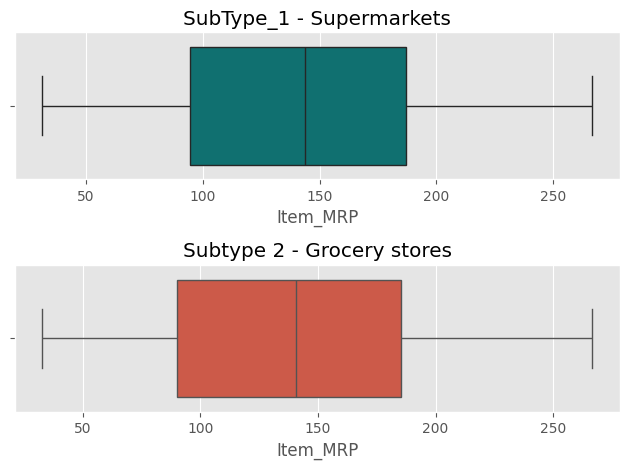

In [4]:
# 7. Using Seaborn (“ggplot style”) create a (2,1) subplot of a box plot showing 5-point
# summary of the column Item_MRP for SupType_1 and SupType_2. Which Outlet Type has
# a higher median MRP? Are there any outliers?
import pandas as pd
import seaborn as sns # importerer seaborn for å bruke boxplot
import matplotlib.pyplot as plt # importerer matplotlib for å bruke ggplot stilen

Grc_df = pd.read_csv("Grocery_dataset.csv")

# new DataFrame Grc_new_df
Grc_new_df = Grc_df.drop(Grc_df.columns[[0, 6]], axis=1)


# To DataFrames, subtype_1 som er supermarkets og subtype_2 som er grocery stores
SubType_1 = Grc_new_df[Grc_new_df["Outlet_Type"].isin(["Supermarket Type1", "Supermarket Type2", "Supermarket Type3"])]
SubType_2 = Grc_new_df[Grc_new_df["Outlet_Type"] == "Grocery Store"]


# bruker matplotlib for å sette ggplot siden seaborn ikke har det
plt.style.use("ggplot")

# konfigurasjon for subplottene, subplots er altså individuelle plotter (type1 & type2)
# 2, 1 betyr å plassere boxplottene vertikalt, du har en 1 kolonne 2 rad
fig, axes = plt.subplots(2, 1)


# ax=axes betyr du sier hvilken sånn rad/kolonne den er basert på axes stilen
# lager en boxplot for SubType_1 og farget den for å vise at det er ulike boxplots, den er plassert på axes[0] som betyr den er øverst (rad 0)
S1 = sns.boxplot(x=SubType_1["Item_MRP"], ax=axes[0], color="teal")
S1.set_title("SubType_1 - Supermarkets")

# lager en boxplot for SubType_2, axes[1] som betyr den er nederst (rad 1)
S2 = sns.boxplot(x=SubType_2["Item_MRP"], ax=axes[1])
S2.set_title("Subtype 2 - Grocery stores")

# justerer mellomrommene slik at boxplotten ikke går inni hverandre
plt.tight_layout()


print(SubType_1["Item_MRP"].median)
print(SubType_2["Item_MRP"].median)

# Sub1 har høyere median & det ser ikke ut som at det er noen outliers, de fleste ligger innenfor de vanlige grensene

In [5]:
# 8. Concatenate the DataFrames SupType_1 and SupType_2 to create a new DataFrame
# Grc_Concat_df and sort it in ascending order based on the column Item_Outlet_Sales.
# What is the Outlet_Location_type of the store with the lowest sales?

import pandas as pd


Grc_df = pd.read_csv("Grocery_dataset.csv")

# new DataFrame Grc_new_df
Grc_new_df = Grc_df.drop(Grc_df.columns[[0, 6]], axis=1)

# To DataFrames, subtype_1 som er supermarkets og subtype_2 som er grocery stores
SubType_1 = Grc_new_df[Grc_new_df["Outlet_Type"].isin(["Supermarket Type1", "Supermarket Type2", "Supermarket Type3"])]
SubType_2 = Grc_new_df[Grc_new_df["Outlet_Type"] == "Grocery Store"]


# ^ Kode fra tidligere oppgaver
# v ny kode

# bruker panda sin concat funksjon, lenker subtype 1 og subtype 2
Grc_Concat_df = pd.concat([SubType_1, SubType_2])

# sorterer den etter "Item_Outlet_Size" i ascending order, dvs lavest på topp og høyest på bunn
SortedValues = Grc_Concat_df.sort_values(by="Item_Outlet_Sales", ascending=True)
print(SortedValues.head(5)) # head for å se hva de første 5 er

# Outlet_Location_Type med lavest salg er Tier 3


      Item_Weight Item_Fat_Content  Item_Visibility           Item_Type  \
906          9.50          Low Fat         0.000000         Soft Drinks   
2571          NaN          Regular         0.134328         Snack Foods   
3053          NaN          Low Fat         0.073077  Health and Hygiene   
4265        15.35          Low Fat         0.023466        Frozen Foods   
2055          NaN          Regular         0.000000        Baking Goods   

      Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
906    32.8900                       1998         NaN               Tier 3   
2571   35.0558                       1985       Small               Tier 1   
3053   34.3216                       1985       Small               Tier 1   
4265   35.2190                       1998         NaN               Tier 3   
2055   38.1848                       1985       Small               Tier 1   

        Outlet_Type  Item_Outlet_Sales  
906   Grocery Store            33.2900 

In [2]:
# 9. Using columns Outlet_Size and Outlet_Location_Type to create a multiple index for
# Grc_Concat_df.

import pandas as pd

Grc_df = pd.read_csv("Grocery_dataset.csv")


# new DataFrame Grc_new_df
Grc_new_df = Grc_df.drop(Grc_df.columns[[0, 6]], axis=1)

# To DataFrames, subtype_1 som er supermarkets og subtype_2 som er grocery stores
SubType_1 = Grc_new_df[Grc_new_df["Outlet_Type"].isin(["Supermarket Type1", "Supermarket Type2", "Supermarket Type3"])]
SubType_2 = Grc_new_df[Grc_new_df["Outlet_Type"] == "Grocery Store"]

# bruker panda sin concat funksjon, lenker subtype 1 og subtype 2
Grc_Concat_df = pd.concat([SubType_1, SubType_2])


# ^ Kode fra tidligere oppgaver
# v ny kode

# setter index basert på outlet_size og outlet_location_type 
Grc_Concat_df = Grc_Concat_df.set_index(["Outlet_Size", "Outlet_Location_Type"])
print(Grc_Concat_df.head(1))

# vi kan nå finne filtrere basert på outlet_size & outlet_location_type
filterert = Grc_Concat_df.loc[("Medium", "Tier 3")] #vi kan bruke .loc for å locate basert på disse kategoriene
print("------------------------Medium & Tier 3------------------------")
print(filterert.head)



                                  Item_Weight Item_Fat_Content  \
Outlet_Size Outlet_Location_Type                                 
Medium      Tier 1                        9.3          Low Fat   

                                  Item_Visibility Item_Type  Item_MRP  \
Outlet_Size Outlet_Location_Type                                        
Medium      Tier 1                       0.016047     Dairy  249.8092   

                                  Outlet_Establishment_Year  \
Outlet_Size Outlet_Location_Type                              
Medium      Tier 1                                     1999   

                                        Outlet_Type  Item_Outlet_Sales  
Outlet_Size Outlet_Location_Type                                        
Medium      Tier 1                Supermarket Type1           3735.138  
------------------------Medium & Tier 3------------------------
<bound method NDFrame.head of                                   Item_Weight Item_Fat_Content  \
Outlet_Size 

C:\Users\Huane\AppData\Local\Temp\ipykernel_15404\626490949.py:28: PerformanceWarning: indexing past lexsort depth may impact performance.
  filterert = Grc_Concat_df.loc[("Medium", "Tier 3")] #vi kan bruke .loc for å locate basert på disse kategoriene


In [ ]:
# 10. Cut the column Item_Weight of Grc_Concat_df into 10 buckets and compute each bucket's
# mean, minimum, maximum, and count.
